In [1]:
"""
Created on Sat Apr 29 10:08:36 2023
@author: TAD
"""
import matplotlib as plt
%matplotlib inline
import numpy as np
import pandas as pd
import scipy,scipy.spatial
import sklearn
import seaborn as sns
import math
from sklearn.manifold import MDS
import random
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
#Reading the Dataset file

data=pd.read_csv("Wholesale customers data.csv")

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# Define Utiliy Functions

def data_insights_report(data=pd.DataFrame()):
    report = pd.DataFrame()
    report['Columns'] = data.columns
    report['Data_Types'] = data.dtypes.values
    report['Unique_Count'] = data.nunique().values
    report['NAN_Count'] = data.isna().sum().values

    tempdf = data.describe().apply(lambda x: round(x,2), axis=1).T
    pd.merge(report,tempdf.reset_index().rename(columns={'index':'Columns'}), on='Columns')

    return report.join(tempdf, on='Columns')

In [5]:
print('Descriptive Statastics of our Data including Channel & Region:')
data_insights_report(data)

Descriptive Statastics of our Data including Channel & Region:


,Columns,Data_Types,Unique_Count,NAN_Count,count,mean,std,min,25%,50%,75%,max
0,Channel,int64,2,0,440.0,1.32,0.47,1.0,1.00,1.0,2.00,2.0
1,Region,int64,3,0,440.0,2.54,0.77,1.0,2.00,3.0,3.00,3.0
2,Fresh,int64,433,0,440.0,12000.30,12647.33,3.0,3127.75,8504.0,16933.75,112151.0
3,Milk,int64,421,0,440.0,5796.27,7380.38,55.0,1533.00,3627.0,7190.25,73498.0
4,Grocery,int64,430,0,440.0,7951.28,9503.16,3.0,2153.00,4755.5,10655.75,92780.0
5,Frozen,int64,426,0,440.0,3071.93,4854.67,25.0,742.25,1526.0,3554.25,60869.0
6,Detergents_Paper,int64,417,0,440.0,2881.49,4767.85,3.0,256.75,816.5,3922.00,40827.0
7,Delicassen,int64,403,0,440.0,1524.87,2820.11,3.0,408.25,965.5,1820.25,47943.0


In [6]:
# The percentage of different types of channels in dataset
data.Channel.value_counts()/len(data.Channel)*100

1    67.727273
2    32.272727
Name: Channel, dtype: float64

In [7]:
# The percentage of different types of channels in dataset

data.Region.value_counts()/len(data.Region)*100

3    71.818182
1    17.500000
2    10.681818
Name: Region, dtype: float64

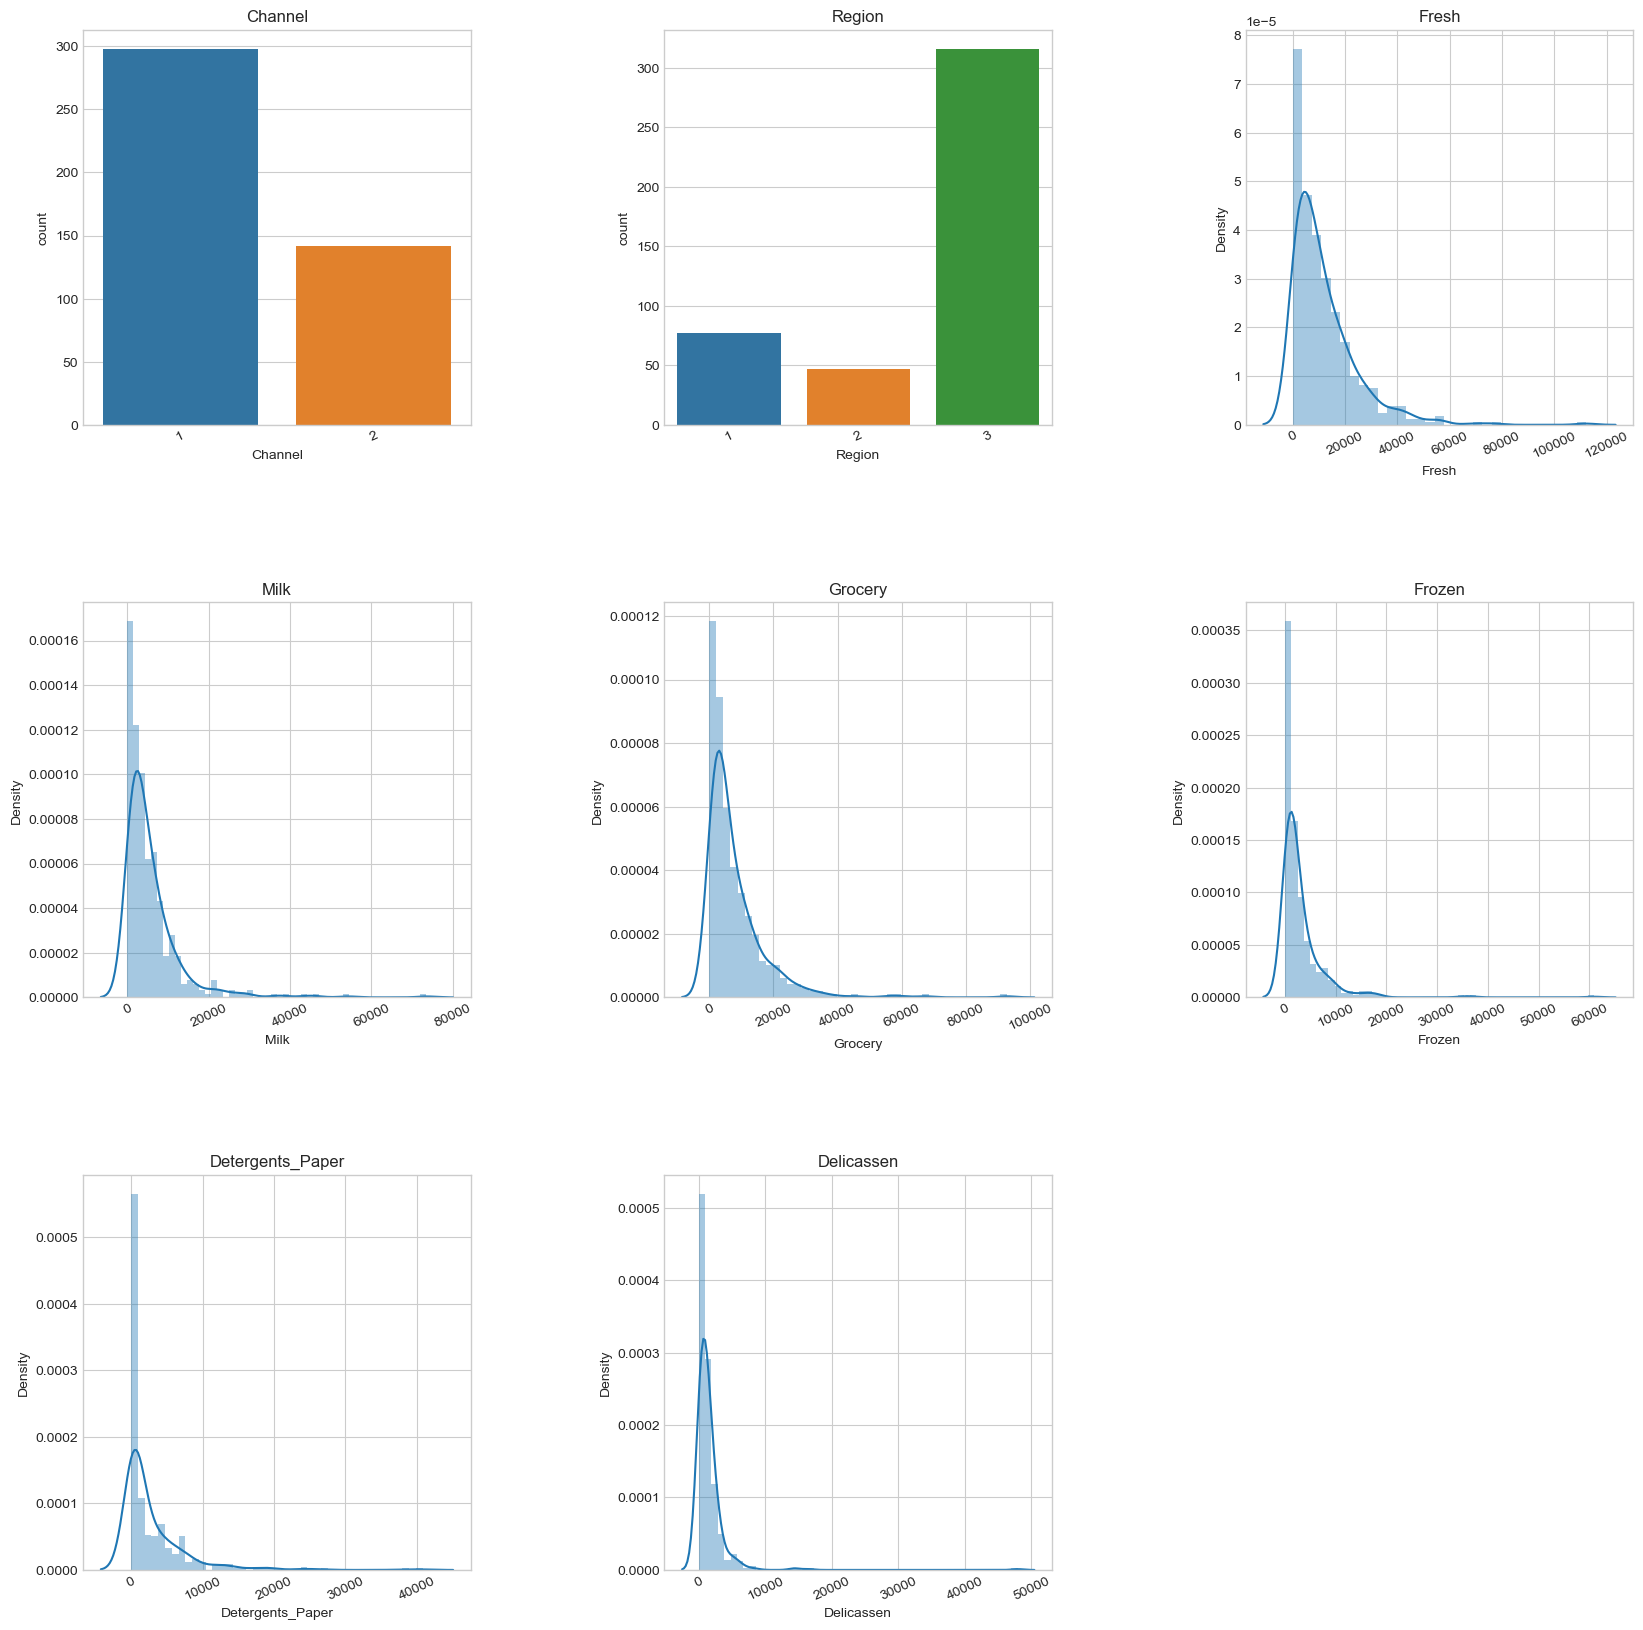

In [8]:
#Plotting Univariate scatterplots and countplots, depending on the type of column

def plot_distribution(df, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(df.shape[1]) / cols)
    for i, column in enumerate(df.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        #if df.dtypes[column] == np.object:
        if column in ['Channel','Region']:
            g = sns.countplot(x=column, data=df)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(df[column])
            plt.xticks(rotation=25)
    
plot_distribution(data, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)


In [9]:

# def plot_histograms(dataframe, features, rows, cols):
#     fig = plt.figure(figsize=(20, 20))
#     for i, feature in enumerate(features):
#         ax = fig.add_subplot(rows, cols, i+1)
#         dataframe[feature].hist(bins=20, ax=ax)
#         ax.set_title(feature )
#     fig.tight_layout()
#     plt.show()


In [10]:
#drop channel and region
df=data.copy()
df = df.drop(columns = ['Channel','Region'])

#plot_distribution(df, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

#### Which Region and Channel seem to spend more (or less)?

In [11]:
#Having the total expenditure for each customer

data['Total']=data.Fresh+data.Milk+data.Grocery+data.Frozen+data.Detergents_Paper+data.Delicassen

In [12]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total
0,2,3,12669,9656,7561,214,2674,1338,34112
1,2,3,7057,9810,9568,1762,3293,1776,33266
2,2,3,6353,8808,7684,2405,3516,7844,36610
3,1,3,13265,1196,4221,6404,507,1788,27381
4,2,3,22615,5410,7198,3915,1777,5185,46100


In [13]:
data.groupby(['Region','Channel'])['Total'].sum()

Region  Channel
1       1          1538342
        2           848471
2       1           719150
        2           835938
3       1          5742077
        2          4935522
Name: Total, dtype: int64

#### Highest Spending is from Region 3 and Channel 1.
#### Lowest Spending is from Region 2 and Channel 1.

#### There are 6 different varieties of items. Do all varieties show similar behaviour across Region and Channel?

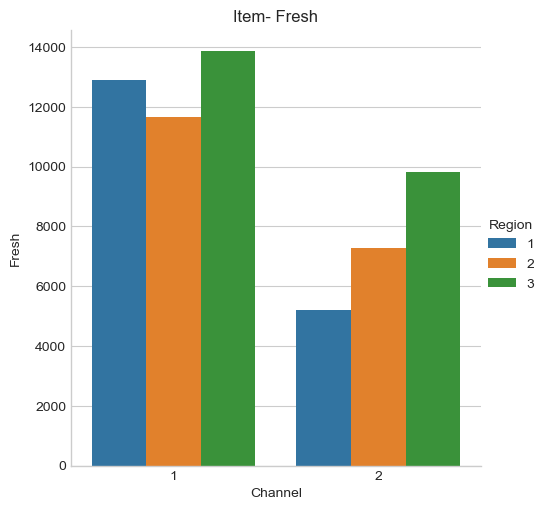

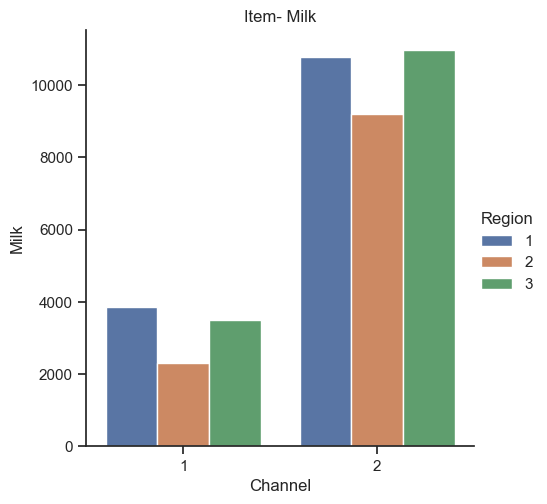

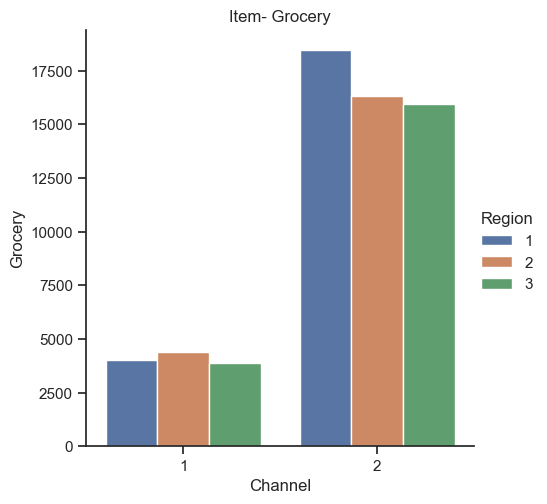

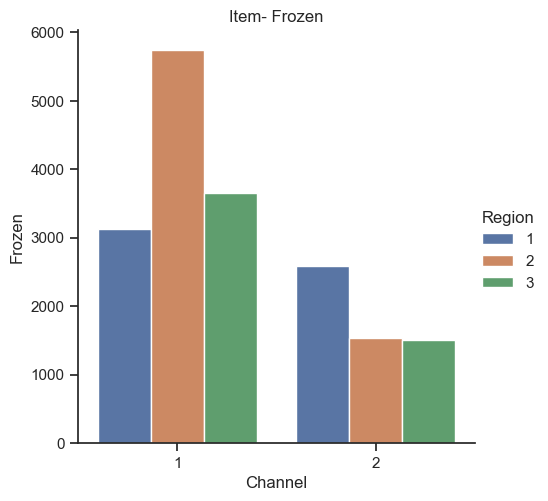

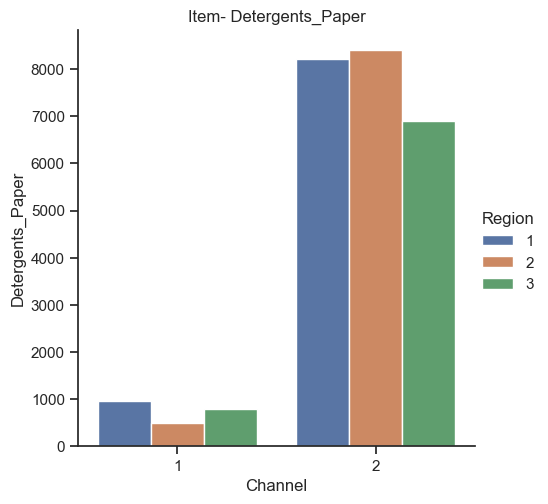

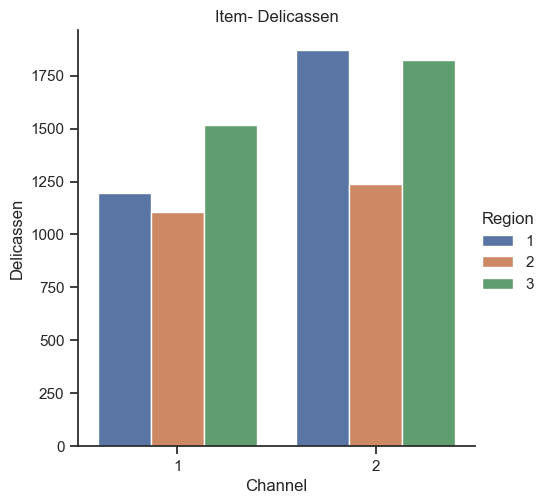

In [14]:
#Histogram for general trend for each item, based on channel and region.
plt.style.use('seaborn-whitegrid')
for i, column in enumerate(df.columns):
        sns.catplot(x="Channel", y=column, hue ="Region", kind="bar", ci=None, data=data)
        sns.set(style="ticks", color_codes=True)
        plt.title('Item- '+column)

For Milk, Grocery and Detergents_paper, Channel 2 seems to spend more than Channel 1.

Region 2 seems to behave differently for Frozen items for Channel 1, as compared to channel 2.

#### On the basis of the descriptive measure of variability, which items show the most and the least inconsistent behaviour resp.?

In [15]:
std_items = df.std() #use standard deviation to check the measure of variabilty
std_items.round(2)

Fresh               12647.33
Milk                 7380.38
Grocery              9503.16
Frozen               4854.67
Detergents_Paper     4767.85
Delicassen           2820.11
dtype: float64

#### Fresh Items are the most inconsistent as they have the highest standard deviation whereas Delicassen is the most consistent

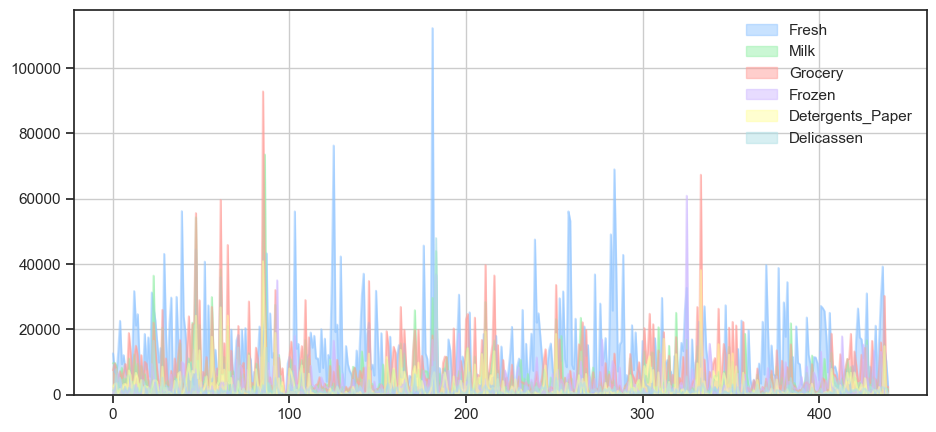

In [16]:
import pylab
pylab.style.use('seaborn-pastel')
df.plot.area(stacked=False,figsize=(11,5))
pylab.grid(); pylab.show()

#X axis: each data point (440 datapoints)
#Y axis: value of each item in every data point


In [17]:
df['Fresh'].nlargest(3).index

Int64Index([181, 125, 284], dtype='int64')

In [18]:
df['Grocery'].nlargest(3).index

Int64Index([85, 333, 61], dtype='int64')

We see highest values for two sample features, e.g., Fresh and Grocery are for datapoints [181, 125, 284] and [85, 333, 61] respectively, which seems to match the spikes in our graph above.  

The spikes could possibly represent anomalous points.

#### Outliers

<Axes: >

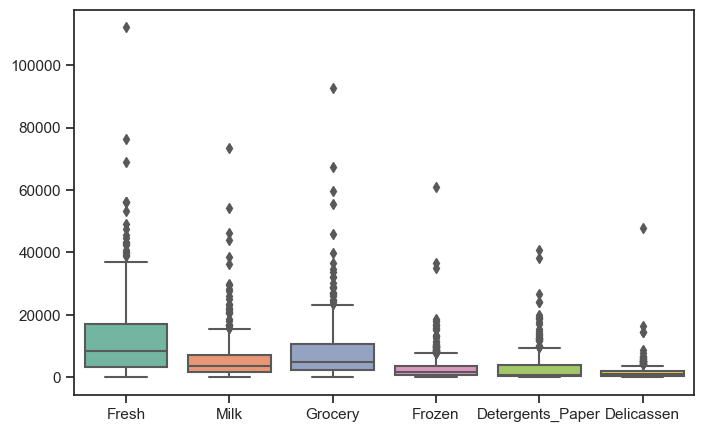

In [19]:
#Boxplots for spread of each feature. There seems to be outliers at the higher end.

plt.figure(figsize=(8,5))
sns.boxplot(data=df, orient="v", palette="Set2")

In [20]:
df.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Fresh,2.561323,11.536408
Milk,4.053755,24.669398
Grocery,3.587429,20.914670
Frozen,5.907986,54.689281
Detergents_Paper,3.631851,19.009464
Delicassen,11.151586,170.694939


As a rule of thumb, skewness can be interpreted like this:

Skewness

Fairly Symmetrical	-0.5 to 0.5

Moderate Skewed	-0.5 to -1.0 and 0.5 to 1.0

Highly Skewed	< -1.0 and > 1.0

#### Hence our features are highly skewed. Apply Log to reduce the Skewness.

In [21]:
df_log =df.add(1).applymap(np.log)

In [22]:
df_log.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Fresh,-1.575326,4.052833
Milk,-0.224063,0.210842
Grocery,-0.674938,3.161866
Frozen,-0.352655,0.269540
Detergents_Paper,-0.235961,-0.301082
Delicassen,-1.091827,2.748784


After the log transformation of data, we observe the data is more symmetric, based on the skewness scores. But "Fresh" and "Delicassen" are still highly skewed.

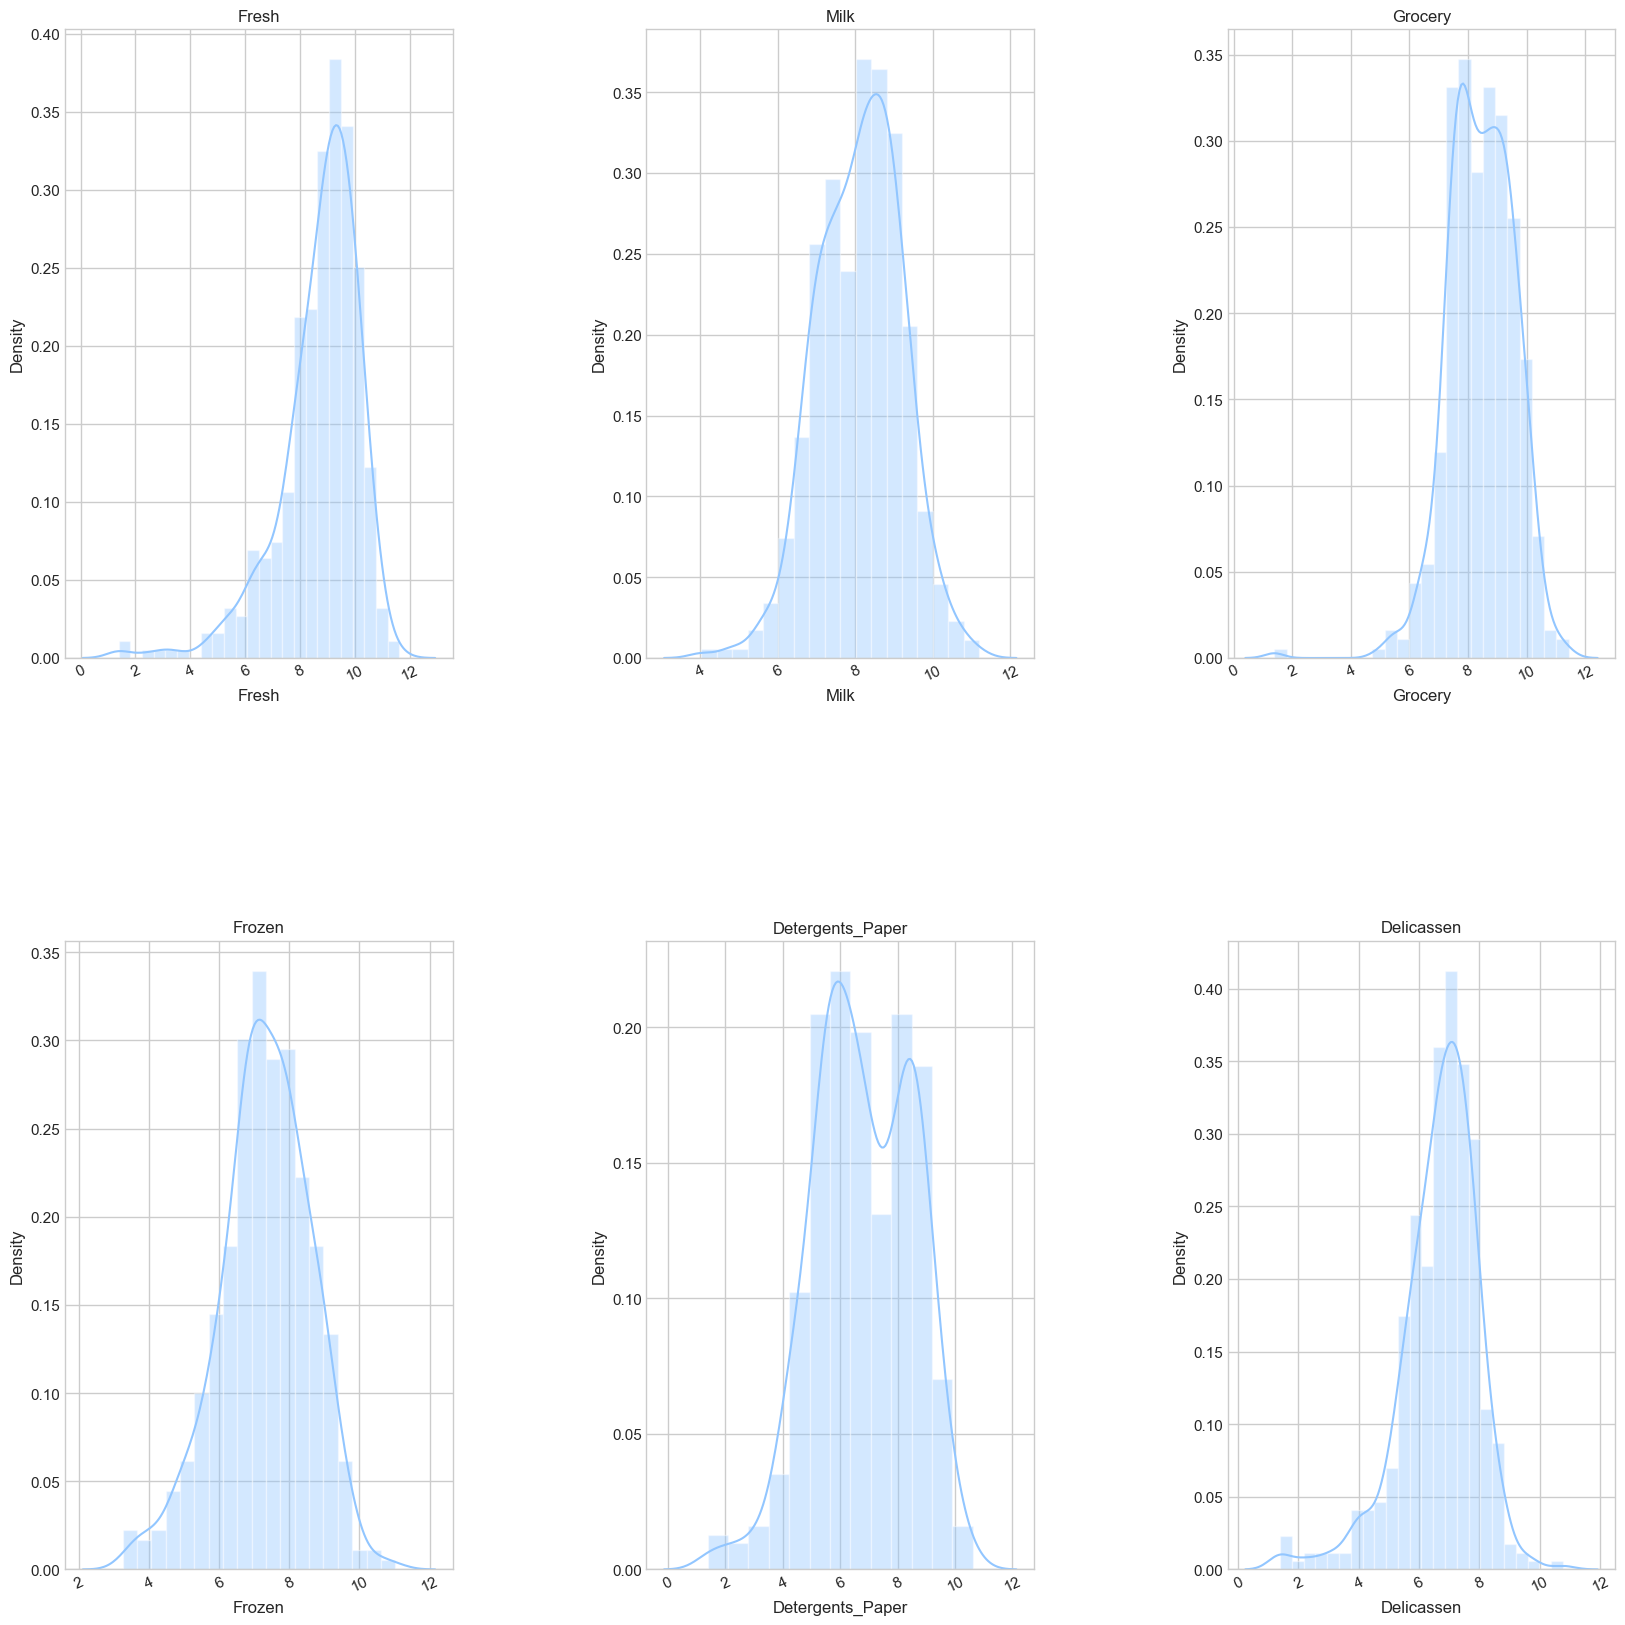

In [23]:
plot_distribution(df_log, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

#### Is there a correlation between any of the items?

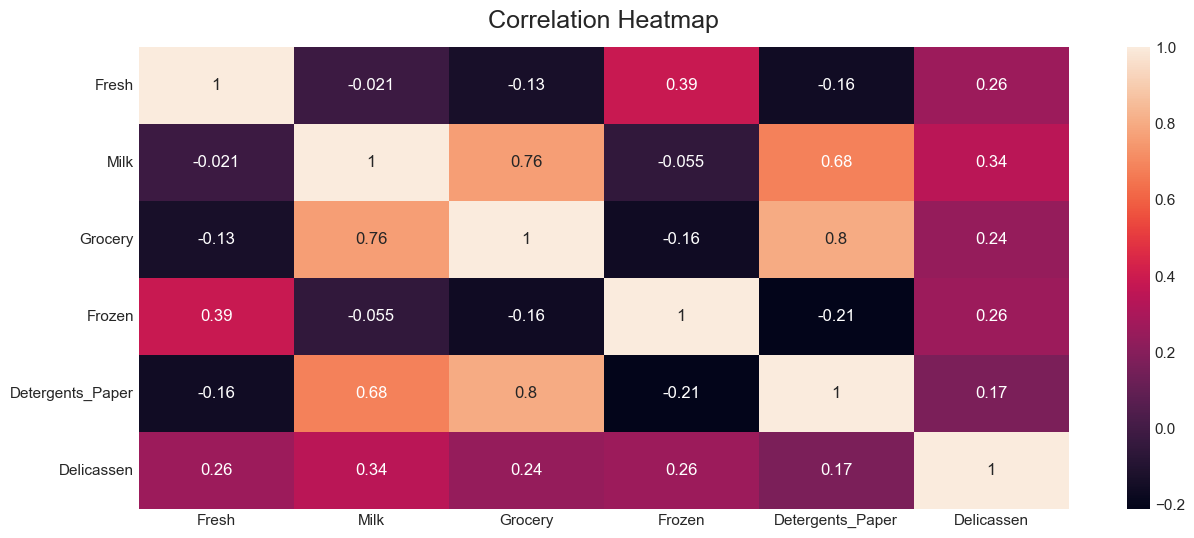

In [24]:
plt.figure(figsize=(15, 6))
heatmap = sns.heatmap(df_log.corr(), annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=14);
plt.show()

#### There is a high correlation between Detergents_Paper and Grocery. Also, Milk and Grocery are considerably correlated.

In [25]:
data_insights_report(df_log)

,Columns,Data_Types,Unique_Count,NAN_Count,count,mean,std,min,25%,50%,75%,max
0,Fresh,float64,433,0,440.0,8.73,1.47,1.39,8.05,9.05,9.74,11.63
1,Milk,float64,421,0,440.0,8.12,1.08,4.03,7.34,8.20,8.88,11.21
2,Grocery,float64,430,0,440.0,8.44,1.11,1.39,7.68,8.47,9.27,11.44
3,Frozen,float64,426,0,440.0,7.30,1.28,3.26,6.61,7.33,8.18,11.02
4,Detergents_Paper,float64,417,0,440.0,6.79,1.71,1.39,5.55,6.71,8.27,10.62
5,Delicassen,float64,403,0,440.0,6.67,1.29,1.39,6.01,6.87,7.51,10.78


In [26]:
df_log.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446992,9.175438,8.930891,5.370638,7.891705,7.199678
1,8.861917,9.191259,9.166284,7.474772,8.099858,7.482682
2,8.756840,9.083529,8.947026,7.785721,8.165364,8.967632
3,9.492960,7.087574,8.348064,8.764834,6.230481,7.489412
4,10.026413,8.596189,8.881697,8.272826,7.483244,8.553718


Correlation between features:

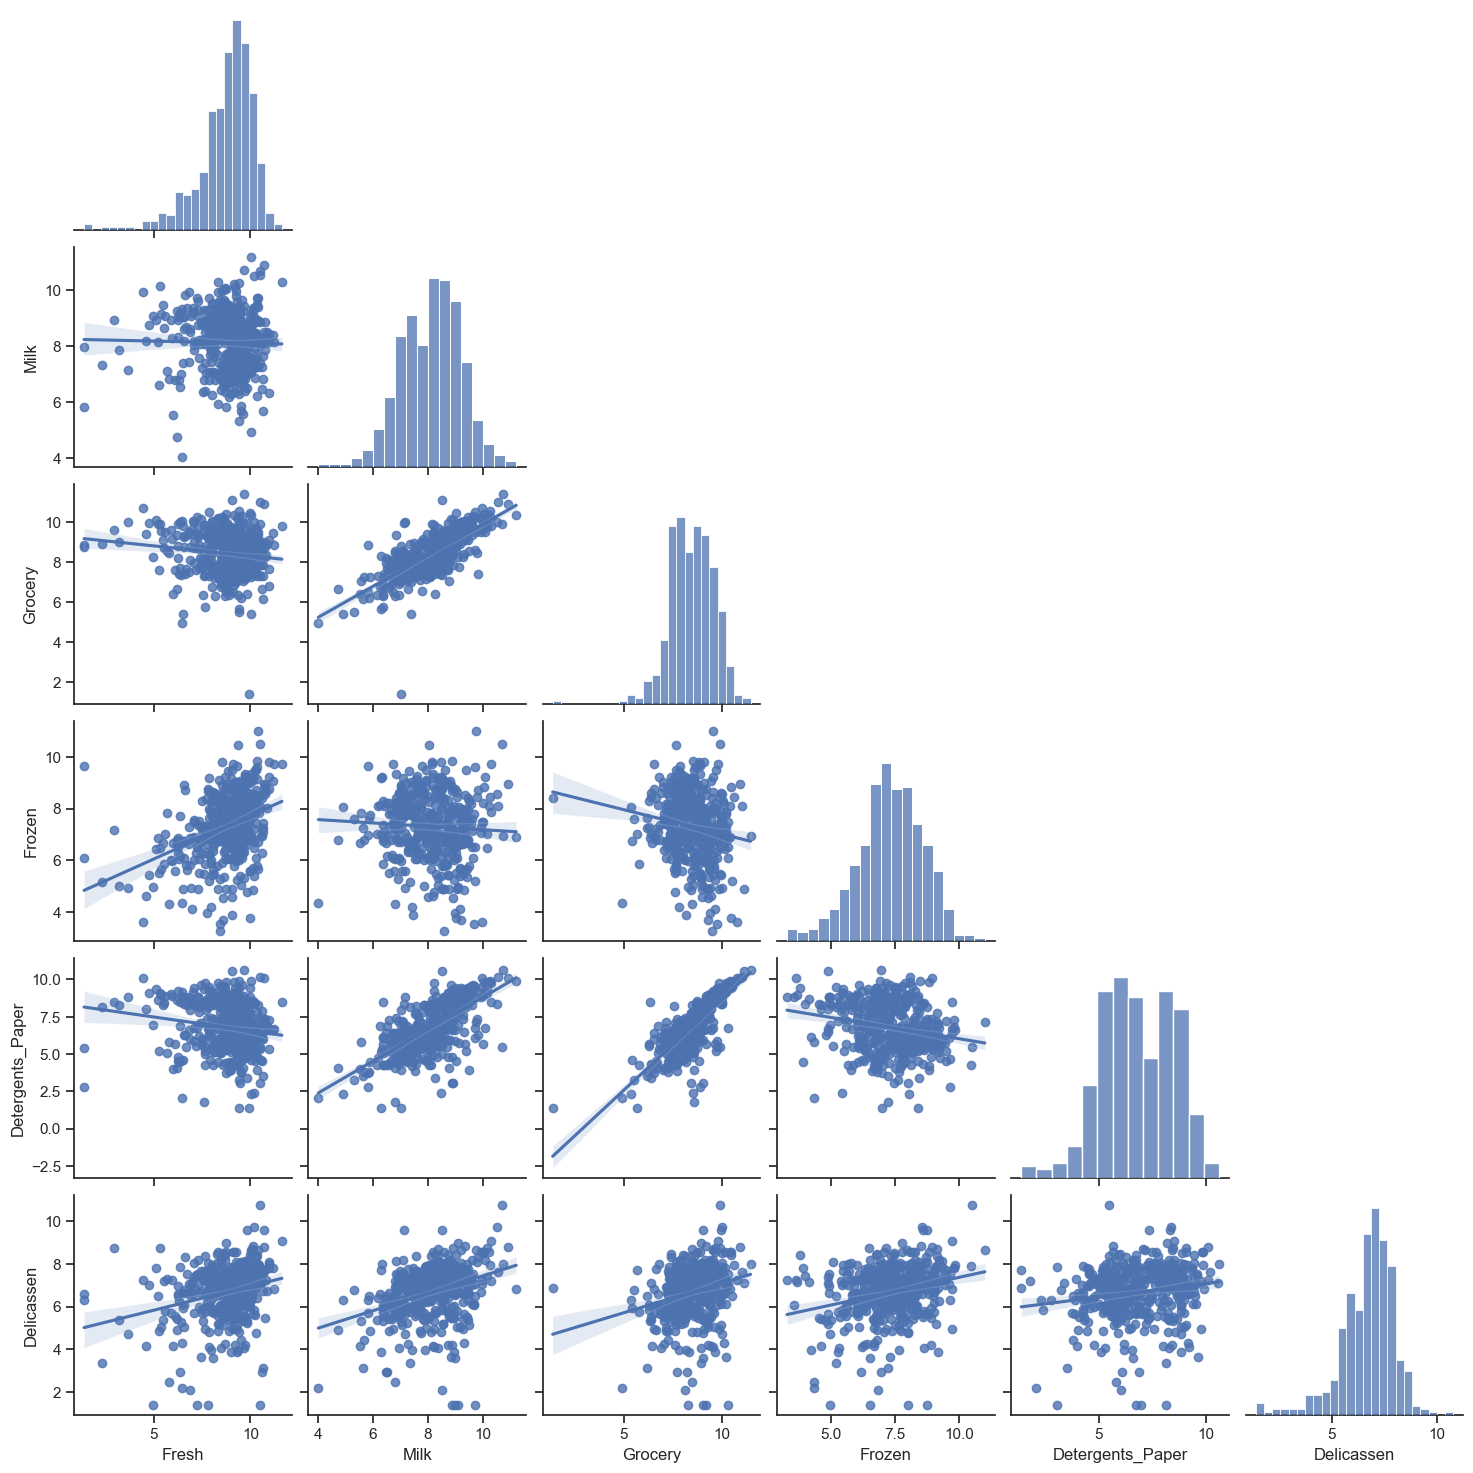

In [27]:
sns.set(style="ticks")
g = sns.pairplot(df_log,corner=True,kind='reg')
g.fig.set_size_inches(15,15)

# Part 2

In [28]:
'''
Function to calculate Distance Matrix.
Input Parameter: Dataframe of size a*b
Output: Distance matrix of size a*a
'''

def calculate_dist_matrix(dataframe):
    X=dataframe.to_numpy()
    D=scipy.spatial.distance.cdist(X,X)
    Dist=pd.DataFrame(D)
    return Dist

In [29]:
dist_matrix = calculate_dist_matrix(df_log)
dist_matrix

,0,1,2,3,4,5,6,7,8,9,...,430,431,432,433,434,435,436,437,438,439
0,0.000000,2.224584,3.085157,4.366366,3.331161,1.307943,1.645392,2.330232,1.597930,2.345042,...,3.195456,4.266183,2.642341,3.901349,1.575182,5.069015,5.564116,2.390978,3.789719,4.616926
1,2.224584,0.000000,1.541680,3.263750,1.988811,1.362131,2.174861,0.780828,2.092733,1.169105,...,3.126408,2.383102,3.582755,3.361482,1.780825,3.848109,5.161151,2.502427,3.735002,5.708060
2,3.085157,1.541680,0.000000,3.431039,1.651504,2.294735,3.340546,1.337177,3.137447,1.921839,...,3.550237,2.656078,4.519018,3.651499,2.882593,4.030637,5.187257,3.148681,3.950812,6.821026
3,4.366366,3.263750,3.431039,0.000000,2.406136,3.262152,3.557725,2.905404,3.407516,4.238947,...,3.455373,2.036131,3.668271,2.804716,3.128861,3.060203,2.677452,5.387722,2.296451,6.012160
4,3.331161,1.988811,1.651504,2.406136,0.000000,2.411643,3.233237,1.699094,3.257427,2.746759,...,3.630900,2.048335,4.048988,3.706398,2.573983,2.953376,4.048232,3.702175,3.330583,6.799926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,5.069015,3.848109,4.030637,3.060203,2.953376,4.127355,4.921473,3.951802,4.778894,4.711158,...,4.008258,2.771055,5.387995,4.462180,4.273217,0.000000,3.931938,5.647413,3.835549,7.464192
436,5.564116,5.161151,5.187257,2.677452,4.048232,4.616688,5.134254,4.925099,4.909501,6.240254,...,4.710604,4.049138,4.677306,3.630164,4.717930,3.931938,0.000000,7.161765,2.356582,6.579825
437,2.390978,2.502427,3.148681,5.387722,3.702175,2.904145,2.933326,2.685797,3.298699,1.598576,...,4.633749,4.682201,4.327725,5.569987,2.807914,5.647413,7.161765,0.000000,5.650544,6.471399
438,3.789719,3.735002,3.950812,2.296451,3.330583,2.943401,3.540550,3.484226,2.993919,4.704888,...,2.547515,3.588645,3.204004,1.992430,3.215658,3.835549,2.356582,5.650544,0.000000,4.904101


In [30]:

'''
Function to detect anomalous points by calculating minimum distane of each point to any other point (i.e. taking the 
minimum value for each row, denoting each data point). 

Input Parameter: 
    1. dist_matrix: Distance Matrix generated in the cell above.
Output: 
    hardmin: Minimum value of each row for all the rows.

''' 

def hardmin(dist_matrix):
    hardmin=dist_matrix.apply(lambda row: row.nsmallest(2).iloc[-1], axis=1)
    return hardmin

Df_HardMin=hardmin(dist_matrix)
Df_HardMin

0      1.086943
1      0.507120
2      1.141368
3      0.975531
4      0.912961
         ...   
435    1.573612
436    1.320107
437    0.983008
438    0.883881
439    2.375114
Length: 440, dtype: float64

In [31]:
'''
We then choose the points which has the largest minimum distance with other points.
In this example, 10 most anomalous points have been shown.
'''

Df_HardMin.nlargest(10)

338    4.945913
75     4.647444
154    4.201955
142    3.774788
95     3.746081
187    3.001067
128    2.973513
183    2.956699
204    2.920883
109    2.721484
dtype: float64

In [32]:
'''
Function to detect anomalous points, but instead of directly taking the minimum value for each row, we use given 
softmin function and apply it for each row (i.e. data point). 

Input Parameter: 
    1. dist_matrix: Distance Matrix generated in the cell above.
    2. gamma: Gamma Value (default value 0.5)
Output: 
    softmin: Softmin value of each row for all the rows.

''' 


def softmin(dist_matrix_row,gamma=0.5):
    sumexp=0
    N=len(dist_matrix_row)
    for i in dist_matrix_row:
        sumexp+=(math.exp((-gamma)*i))
        
    softmin= math.log((sumexp-1)/(N-1)) * (-1/gamma)  
    return softmin


gamma=0.5
Df_SoftMin=dist_matrix.apply(softmin,args=(gamma,), axis=1)
Df_SoftMin

0      3.523866
1      2.996242
2      3.578611
3      3.069036
4      3.367632
         ...   
435    4.244221
436    3.960418
437    4.143021
438    3.114930
439    4.939460
Length: 440, dtype: float64

In [33]:
'''
Similarly, we then choose the points which has the largest softmin distance with other points.
In this example, 10 most anomalous points have been shown.
'''

Df_SoftMin.nlargest(10)

338    9.151482
154    8.881429
75     8.698126
95     7.730110
66     7.595647
128    7.111647
142    7.073153
65     6.834986
218    6.659030
357    6.521975
dtype: float64

In [34]:
'''
Function to use bootstrapping method to randomly sample half of the instances from the original dataset.
We then apply softmin() to getmost anomalous points from the bootstrapped data.

Input Parameter: 
    1. dataframe: Distance Matrix generated in the cell above.
    2. number_of_bootstraps: Number of times bootstrapping is to be performed (default value 3).
    3. gamma: Gamma Value (default value 0.5)
Output: 
    data: Dataframe containing anomalous points and their anomaly score for each bootstrap.

''' 


def bootstrap(dataframe, 
              number_of_bootstraps=3, 
              gamma=0.5):
    
    
    n_samples = len(dataframe) // 2
    n_largest = n_samples
    
    data = pd.DataFrame()

    for i in range(number_of_bootstraps):
        
        # Draw random samples with replacement from the original data
        sample_data = dataframe.sample(n=n_samples, replace=True)
        
        #calculate distance matrix of sampled data
        sample_dist_matrix = calculate_dist_matrix(sample_data)
        
        #apply softmin to the distance matrix
        sample_softmin=sample_dist_matrix.apply(softmin,args=(gamma,), axis=1)
        
        #sort points according to their anomaly score for different bootstrap results and add them to a table
        data[str(i+1)+'_gamma_'+str(round(gamma,2))] = sample_softmin.nlargest(n_largest).index
        data[str(i+1)+'score_'+str(round(gamma,2))] = sample_softmin.nlargest(n_largest).values
        
    return data


bootstrap_data=bootstrap(df_log,5,0.5)
bootstrap_data[:10]

,1_gamma_0.5,1score_0.5,2_gamma_0.5,2score_0.5,3_gamma_0.5,3score_0.5,4_gamma_0.5,4score_0.5,5_gamma_0.5,5score_0.5
0,138,8.820652,117,8.462460,134,7.092085,41,9.165425,140,8.909708
1,27,8.534227,122,8.462460,67,6.996711,211,8.828446,32,6.709896
2,115,8.534227,39,7.180956,115,6.699056,37,8.634154,110,6.408965
3,85,6.471290,194,7.169793,208,6.154864,199,7.180902,215,6.350770
4,17,6.361243,113,6.982584,58,6.154864,148,7.180902,47,6.298090
5,168,6.291427,34,6.982584,75,6.139291,106,7.064719,112,6.206199
6,171,6.291427,59,6.982584,123,6.139291,201,6.932884,94,6.206199
7,217,6.284391,44,6.561160,60,6.106953,60,6.532134,198,5.854642
8,150,6.148879,108,6.437400,159,6.055305,64,6.532134,79,5.372812
9,163,5.983124,28,6.289279,31,5.745166,134,6.450658,61,5.302570


<Axes: >

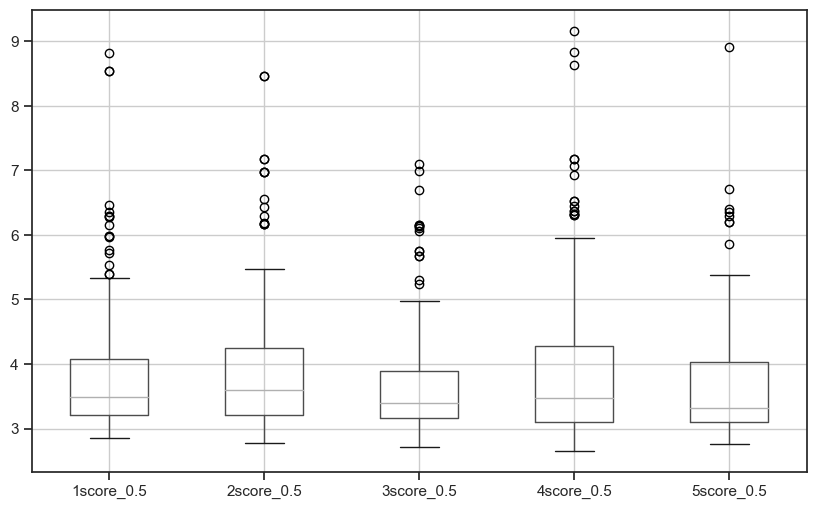

In [35]:
# Boxplot with spread of anomaly score in each bootstrap 
plt.figure(figsize=(10,6))

bootstrap_data.filter(like='score').boxplot()

In [36]:
'''
Function to use different gamma values while bootstrapping. Gamma values are generated randomly within a range 
provided by user.


Input Parameter: 
    1. dataframe: Original Data
    2. n_diff_gammas: Number of gammas we want to experiment with (default value 3).
    3. gamma_low: Lower bound of Gamma value (default value 0.1).
    4. gamma_high: Upper bound of Gamma value (default value 5).
Output: 
    data: Dataframe containing anomalous points and their anomaly score for each bootstrap for each gamma.

''' 


def bootstrap_gamma(dataframe,
                    n_diff_gammas=5,
                    gamma_low=0.1,
                    gamma_high=0.5):
    
    data = pd.DataFrame()
    
    for i in range(n_diff_gammas):
        gamma=random.uniform(gamma_low,gamma_high)
        print('gamma:', gamma,'------------')
        bootstrap_gamma_outliers = bootstrap(dataframe,1,gamma)
#         print(bootstrap_gamma_outliers)
        data=pd.concat([data, bootstrap_gamma_outliers], axis=1)
        data.columns = data.columns.str.lstrip('1_')
    return data
            

outliers=bootstrap_gamma(df_log,
                         n_diff_gammas=5,
                         gamma_low=0.5,
                         gamma_high=5 )


gamma: 1.145850528586645 ------------
gamma: 3.2018784174948447 ------------
gamma: 4.160309073862101 ------------
gamma: 1.0139079887659532 ------------
gamma: 4.493397781517854 ------------


In [37]:
outliers  #output of function bootstrap_gamma

,gamma_1.15,score_1.15,gamma_3.2,score_3.2,gamma_4.16,score_4.16,gamma_1.01,score_1.01,gamma_4.49,score_4.49
0,87,7.763259,140,4.387418,149,5.449131,204,8.045576,64,6.144808
1,39,6.717649,124,4.047204,102,4.012690,112,6.489130,49,4.781466
2,5,6.523850,96,3.802172,99,3.832200,63,6.239136,203,3.977557
3,133,6.090311,166,3.673793,74,3.818150,212,6.033537,109,3.818612
4,139,6.072819,34,3.630190,14,3.778956,208,5.982512,199,3.815482
...,...,...,...,...,...,...,...,...,...,...
215,153,2.383754,98,1.301191,133,1.119498,195,2.392022,159,0.952010
216,142,2.364854,16,1.286866,125,1.119498,16,2.392022,36,0.945501
217,24,2.351204,17,1.286866,98,1.115676,207,2.366019,209,0.945501
218,123,2.329081,41,1.286866,80,1.115676,134,2.366019,55,0.945501


<Axes: >

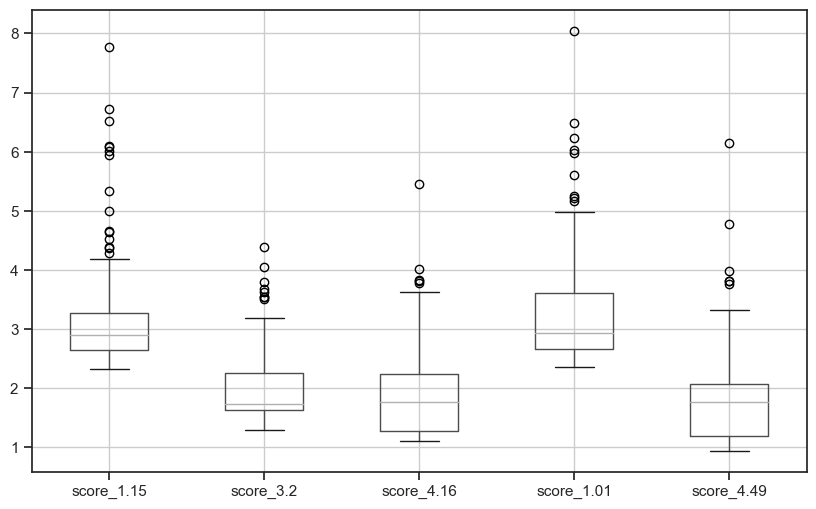

In [38]:
''' 
Boxplot with spread of anomaly score in each bootstrap for each gamma.

Observation: Different Gamma values usually leads to different spreads in the anomaly scores.
'''
plt.figure(figsize=(10,6))

outliers.filter(like='score').boxplot()

Since we observe different range of scores for different values of gamma, how do we choose gamma?


In [39]:
''' 
Function to check how gradually increasing Gamma values affects anomaly scores while bootstrapping. 

Input Parameter: 
    1. dataframe: Dataset
    2. n_diff_gammas: Number of gammas we want to experiment with (default value 3).
    3. gamma_init: Lower bound of Gamma value (default value 0.1).
    4. increase_gamma_by: Amount by which previous gamma value is to be increased in each step (default value 0.5).
Output: 
    data: Dataframe containing anomalous points and their anomaly score for each bootstrap for each gamma.


'''


def bootstrap_gamma(dataframe,
                    n_diff_gammas=3,
                    gamma_init=0.1,
                    increase_gamma_by=0.5):
    
    data = pd.DataFrame()
    gamma=gamma_init
    
    for i in range(n_diff_gammas):
        bootstrap_gamma_outliers = bootstrap(dataframe,1,gamma)
#         print(bootstrap_gamma_outliers)
        data=pd.concat([data, bootstrap_gamma_outliers], axis=1)

        gamma+=increase_gamma_by

    data.columns = data.columns.str.lstrip('1_')

    return data
            

outliers_increasing_gamma=bootstrap_gamma(df_log,
                                          n_diff_gammas=1000,
                                          gamma_init=0.01,
                                          increase_gamma_by=0.005)


In [40]:
outliers_boxplot = outliers_increasing_gamma.filter(like='score')
outliers_boxplot.columns = outliers_boxplot.columns.str.lstrip('score_')

outliers_boxplot

,0.01,0.01,0.02,0.03,0.03,0.04,0.04,0.04,0.05,0.05,...,4.96,4.96,4.97,4.97,4.98,4.98,4.99,4.99,5.0,5.0
0,9.613845,8.200121,9.690076,9.555392,9.417074,9.630238,7.552890,7.275582,8.170048,9.160283,...,6.452576,5.310878,5.890585,5.284534,5.128057,4.851046,5.525356,4.814352,6.494195,6.119436
1,9.613845,8.114947,9.690076,8.226959,9.417074,9.630238,7.394224,6.889271,7.456460,8.334971,...,4.829493,5.286954,5.756489,4.620039,4.619280,4.048009,4.545916,4.016858,5.713386,4.848896
2,8.262643,7.698791,8.300161,7.619961,8.238438,7.697700,6.835907,6.860687,7.417589,7.252700,...,4.359823,4.000406,4.386919,4.137305,4.141984,4.025355,3.731829,3.806746,5.247541,4.271151
3,7.400310,7.129159,8.254530,7.136393,7.731285,7.240910,6.433346,6.860687,7.021558,7.226965,...,3.811639,3.994027,4.207148,4.136896,3.433994,3.651109,3.464637,3.794671,4.909900,4.003782
4,6.809749,7.082247,7.640914,7.136393,7.483699,6.763026,6.340437,6.748351,7.021558,6.581224,...,3.810722,3.814771,4.143002,3.484035,3.230835,3.461094,3.443736,3.445855,3.994031,3.768332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,3.114807,3.302475,3.339715,3.056631,3.252527,3.093070,3.024815,3.293699,3.074379,2.883225,...,0.943325,0.863878,0.939397,0.937268,0.938720,0.928553,0.898703,0.801280,0.858077,0.917696
216,3.077798,3.272786,3.324909,3.052706,3.252527,3.084988,3.024815,3.291412,3.072551,2.883225,...,0.943325,0.861504,0.860109,0.937268,0.856392,0.928553,0.859041,0.801280,0.857831,0.857235
217,3.077798,3.261821,3.278925,3.047257,3.251848,3.043829,3.007199,3.291412,3.054428,2.874158,...,0.942135,0.861504,0.860109,0.912982,0.856392,0.924690,0.859041,0.801280,0.857831,0.857235
218,3.068080,3.223535,3.244716,3.047257,3.226257,3.038146,2.963045,3.271539,3.054428,2.874158,...,0.942135,0.861504,0.860109,0.912982,0.856392,0.924690,0.859041,0.801280,0.857831,0.857235


In [41]:
variance = outliers_boxplot.var()
# variance
median = outliers_boxplot.median()



In [42]:
variance

0.01    1.017228
0.01    0.996442
0.02    1.153689
0.03    1.019886
0.03    1.199465
          ...   
4.98    0.453118
4.99    0.510753
4.99    0.441325
5.0     0.719093
5.0     0.605004
Length: 1000, dtype: float64

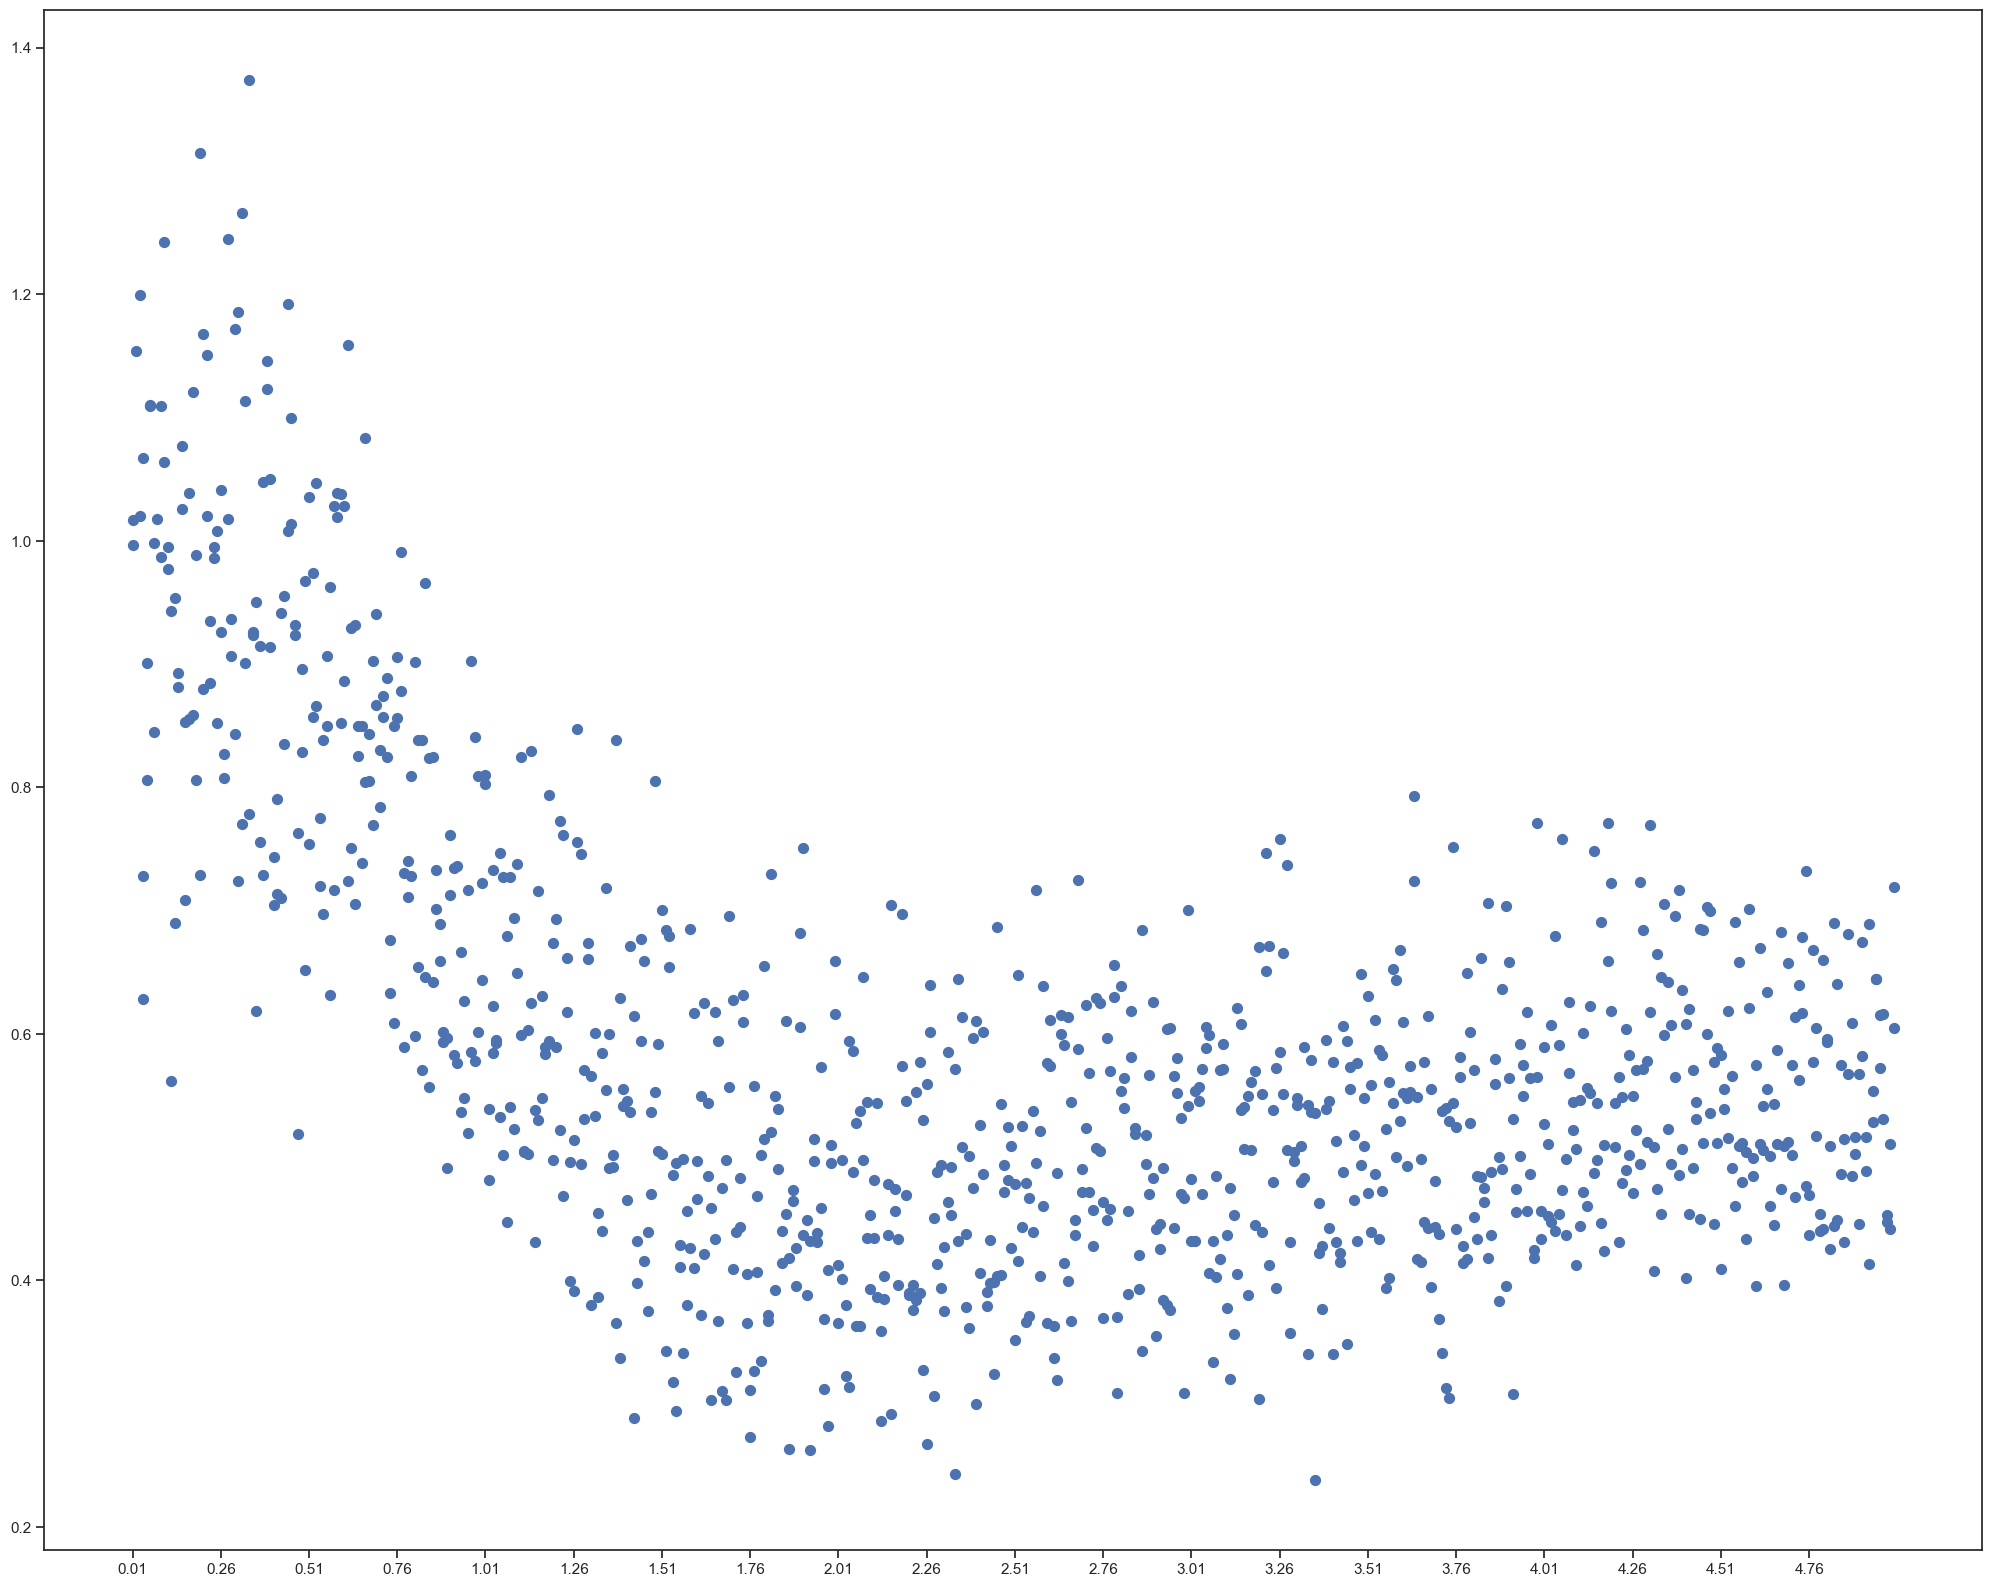

In [43]:
import matplotlib.pyplot as plt

x1=[float(x) for x in variance.index]
y1=[float(x) for x in variance.values]

# Define the interval for x-axis values
x_interval = 50

plt.figure(figsize=(25,20))

# Create the scatter plot
plt.scatter(x1, y1,s=50)



plt.xticks(x1[::x_interval])

# Display the plot
plt.show()


We choose gamma to be 1.5!  

We now repeat the softmin and see anomalous points!

In [44]:
gamma=1.5
Df_SoftMin=dist_matrix.apply(softmin,args=(gamma,), axis=1)
Df_SoftMin

0      2.922418
1      2.334077
2      2.929370
3      2.480738
4      2.737929
         ...   
435    3.585402
436    3.177422
437    3.203080
438    2.527323
439    4.363823
Length: 440, dtype: float64

In [45]:
Df_SoftMin.nlargest(10) #supposed to be most anomalous

338    8.183188
75     7.518569
154    7.432491
95     6.684082
142    6.422580
128    5.861355
187    5.590151
66     5.585870
109    5.573200
183    5.560977
dtype: float64

In [46]:
Df_SoftMin.nsmallest(10) #supposed to be in a cluster

246    2.231108
119    2.238386
389    2.239246
26     2.255172
374    2.255263
118    2.270828
162    2.271704
241    2.273313
415    2.279522
307    2.291392
dtype: float64

In [47]:
s=Df_SoftMin.nlargest(10).index #visualizing data points with high anomaly scores
df.loc[s]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
338,3,333,7021,15601,15,550
75,20398,1137,3,4407,3,975
154,622,55,137,75,7,8
95,3,2920,6252,440,223,709
142,37036,7152,8253,2995,20,3
128,140,8847,3823,142,1062,3
187,2438,8002,9819,6269,3459,3
66,9,1534,7417,175,3468,27
109,1406,16729,28986,673,836,3
183,36847,43950,20170,36534,239,47943


# Part 3

In [48]:
gamma = 1.5

In [49]:
def calculate_dist_matrix(dataframe):
    X=dataframe.to_numpy()
    D=scipy.spatial.distance.cdist(X,X, 'sqeuclidean')
    Dist=pd.DataFrame(D)
    return Dist

dist_matrix=calculate_dist_matrix(df_log)
dist_matrix

,0,1,2,3,4,5,6,7,8,9,...,430,431,432,433,434,435,436,437,438,439
0,0.000000,4.948773,9.518191,19.065155,11.096636,1.710715,2.707316,5.429980,2.553380,5.499223,...,10.210938,18.200315,6.981967,15.220520,2.481199,25.694910,30.959383,5.716774,14.361973,21.316007
1,4.948773,0.000000,2.376777,10.652066,3.955369,1.855401,4.730022,0.609692,4.379533,1.366806,...,9.774427,5.679174,12.836134,11.299559,3.171338,14.807943,26.637482,6.262140,13.950237,32.581946
2,9.518191,2.376777,0.000000,11.772031,2.727466,5.265807,11.159248,1.788044,9.843574,3.693466,...,12.604180,7.054751,20.421522,13.333447,8.309340,16.246037,26.907633,9.914189,15.608919,46.526389
3,19.065155,10.652066,11.772031,0.000000,5.789492,10.641634,12.657410,8.441374,11.611165,17.968674,...,11.939602,4.145827,13.456209,7.866430,9.789773,9.364841,7.168748,29.027548,5.273686,36.146073
4,11.096636,3.955369,2.727466,5.789492,0.000000,5.816020,10.453823,2.886920,10.610833,7.544686,...,13.183436,4.195675,16.394306,13.737388,6.625387,8.722427,16.388185,13.706102,11.092780,46.238995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,25.694910,14.807943,16.246037,9.364841,8.722427,17.035060,24.220897,15.616737,22.837826,22.195014,...,16.066132,7.678746,29.030486,19.911053,18.260381,0.000000,15.460136,31.893274,14.711436,55.714157
436,30.959383,26.637482,26.907633,7.168748,16.388185,21.313810,26.360568,24.256605,24.103205,38.940770,...,22.189790,16.395520,21.877194,13.178090,22.258862,15.460136,0.000000,51.290882,5.553480,43.294098
437,5.716774,6.262140,9.914189,29.027548,13.706102,8.434060,8.604404,7.213507,10.881412,2.555446,...,21.471633,21.923008,18.729204,31.024761,7.884380,31.893274,51.290882,0.000000,31.928648,41.878999
438,14.361973,13.950237,15.608919,5.273686,11.092780,8.663607,12.535495,12.139833,8.963553,22.135972,...,6.489833,12.878374,10.265641,3.969778,10.340456,14.711436,5.553480,31.928648,0.000000,24.050205


In [50]:
'''
Alternate function to calculate softmin
'''

def rowsum_except_diagonal_value(df: pd.DataFrame):
    row_sum_df = df.sum(axis=1)
    diag = np.diag(df)
    row_sum_df_ex_diag = row_sum_df - diag
    return row_sum_df_ex_diag

def softmin_2(dist_matrix:pd.DataFrame,gamma:float):
    gamma_exp_dist_matrix = dist_matrix.apply(lambda x: np.exp(-gamma * x))
    exp_row_sum = rowsum_except_diagonal_value(gamma_exp_dist_matrix)
    # softmin
    df_softmin = np.log(exp_row_sum / (len(exp_row_sum) - 1)) * (-1 / gamma)
    return df_softmin
df_softmin = softmin_2(dist_matrix,gamma)
df_softmin

0      4.112392
1      2.753624
2      4.161826
3      3.259922
4      3.603235
         ...   
435    5.618648
436    4.829319
437    4.361749
438    3.374563
439    9.124005
Length: 440, dtype: float64

In [51]:
'''
calculating the relevance of each datapoint:
the contribution of 439 other customers to one customer ,while calculating the softmin,
it will be an NxN matrix where N is the number of datapoints/customers,
'''
def relevance_of_each_data_point(dist_matrix:pd.DataFrame,softmin:pd.Series,gamma:float):
    gamma_exp_dist_matrix = dist_matrix.apply(lambda x: np.exp(-gamma * x))
    exp_row_sum = gamma_exp_dist_matrix.sum(axis=1)-1
    relevance_matrix_by_datapoint = gamma_exp_dist_matrix.div(exp_row_sum,axis=0)
    relevance_matrix_by_datapoint = relevance_matrix_by_datapoint.mul(softmin,axis = 0)
    df_array = relevance_matrix_by_datapoint.values
    np.fill_diagonal(df_array, 0)
    relevance_matrix_by_datapoint = pd.DataFrame(df_array, columns=relevance_matrix_by_datapoint.columns)
    return relevance_matrix_by_datapoint

relevance_matrix_by_customer  = relevance_of_each_data_point(dist_matrix=dist_matrix,
                                                        softmin=df_softmin,
                                                        gamma = gamma)


relevance_matrix_by_customer

,0,1,2,3,4,5,6,7,8,9,...,430,431,432,433,434,435,436,437,438,439
0,0.000000e+00,2.671634e-03,2.818816e-06,1.701283e-12,2.641206e-07,3.437024e-01,7.708246e-02,1.298071e-03,9.710369e-02,1.170013e-03,...,9.972019e-07,6.225434e-12,1.265522e-04,5.436657e-10,1.082075e-01,8.163519e-17,3.036547e-20,8.442449e-04,1.970723e-09,5.814034e-14
1,2.330389e-04,0.000000e+00,1.103909e-02,4.488127e-08,1.034124e-03,2.413125e-02,3.235429e-04,1.563458e-01,5.473370e-04,5.021935e-02,...,1.674156e-07,7.791378e-05,1.695398e-09,1.699266e-08,3.352148e-03,8.805491e-11,1.731801e-18,3.249722e-05,3.187855e-10,2.322878e-22
2,3.072270e-06,1.379350e-01,0.000000e+00,1.045236e-07,8.151190e-02,1.809839e-03,2.620634e-07,3.335802e-01,1.885782e-06,1.913940e-02,...,2.999974e-08,1.236652e-04,2.424235e-13,1.004715e-08,1.883456e-05,1.272507e-10,1.442951e-17,1.696250e-06,3.309066e-10,2.392077e-30
3,3.754520e-13,1.135511e-07,2.116409e-08,0.000000e+00,1.670611e-04,1.153419e-07,5.608237e-09,3.128444e-06,2.693978e-08,1.944679e-12,...,1.646026e-08,1.966195e-03,1.692216e-09,7.410900e-06,4.139284e-07,7.829665e-07,2.110425e-05,1.215166e-19,3.621533e-04,2.801121e-24
4,1.078237e-07,4.839867e-03,3.053097e-02,3.090364e-04,0.000000e+00,2.969804e-04,2.827938e-07,2.403619e-02,2.234534e-07,2.221279e-05,...,4.712875e-09,3.375114e-03,3.815851e-11,2.053138e-09,8.820077e-05,3.796410e-06,3.851048e-11,2.151788e-09,1.084492e-07,1.378846e-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,1.068199e-15,1.320921e-08,1.527715e-09,4.642375e-05,1.216846e-04,4.677782e-10,9.747337e-15,3.926401e-09,7.760250e-14,2.035311e-13,...,2.000966e-09,5.822814e-04,7.173300e-18,6.258901e-12,7.444141e-11,0.000000e+00,4.966047e-09,9.789928e-20,1.526671e-08,2.970722e-35
436,1.045218e-19,6.833979e-17,4.557073e-17,3.291693e-04,3.247086e-10,2.007871e-13,1.035302e-16,2.430392e-15,3.059199e-15,6.603872e-25,...,5.396174e-14,3.211552e-10,8.624308e-14,4.005746e-08,4.865072e-14,1.306360e-09,0.000000e+00,5.948675e-33,3.712551e-03,9.635162e-28
437,1.301597e-03,5.743844e-04,2.399415e-06,8.489178e-19,8.126344e-09,2.209650e-05,1.711411e-05,1.378613e-04,5.623617e-07,1.492442e-01,...,7.097483e-14,3.606281e-14,4.341469e-12,4.244224e-20,5.039734e-05,1.153487e-20,2.664410e-33,0.000000e+00,1.093877e-20,3.604908e-27
438,5.346820e-10,9.915559e-10,8.237261e-11,4.452303e-04,7.207491e-08,2.755808e-06,8.278268e-09,1.498615e-08,1.757323e-06,4.610923e-15,...,7.183499e-05,4.949639e-09,2.492396e-07,3.147784e-03,2.227816e-07,3.165488e-10,2.926277e-04,1.925000e-21,0.000000e+00,2.610820e-16


In [52]:
'''
Summing over the relevances to check whether it adds upto the softmin
'''
relevance_matrix_by_customer_sum = relevance_matrix_by_customer.sum(axis=1)
relevance_matrix_by_customer_sum

0      4.112392
1      2.753624
2      4.161826
3      3.259922
4      3.603235
         ...   
435    5.618648
436    4.829319
437    4.361749
438    3.374563
439    9.124005
Length: 440, dtype: float64

In [53]:
"Check if there is a difference between softmin and relevance of each datapoint "
max(round(relevance_matrix_by_customer_sum,3) - round(df_softmin,3))

0.0

In [54]:
'''
calculation of relevance by each feature, 
i.e how much each feature contributes to each customer's relevance score
output will be a Nxd matrix where d is the number of features and N is the number of data points

'''
relevance_per_customer_per_feature  = pd.DataFrame()
for feature in df_log.columns:
    feature_series = df_log[feature]
    for j in range(len(feature_series)):
        feature_squared = (feature_series - df_log.loc[j,feature])**2
        dist_j_k = dist_matrix.loc[:,j]
        feature_contri = feature_squared.div(dist_j_k)
        feature_contri = feature_contri.fillna(0)
        relevance_i_j = sum((relevance_matrix_by_customer.iloc[j])*feature_contri)
        relevance_per_customer_per_feature.loc[j,feature] = relevance_i_j

relevance_per_customer_per_feature


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.904516,0.583854,0.250292,1.437025,0.468388,0.468318
1,0.644680,0.661569,0.185157,0.631423,0.350877,0.279917
2,0.589532,0.614826,0.175790,0.448208,0.342300,1.991170
3,0.464723,0.687186,0.493128,0.437054,0.460333,0.717498
4,0.472894,0.313277,0.237213,1.141064,0.595644,0.843142
...,...,...,...,...,...,...
435,0.202129,1.107492,1.623817,0.656590,1.101971,0.926649
436,0.600827,0.809939,1.203615,0.727913,1.038167,0.448858
437,0.324045,0.274384,0.377892,1.894288,0.638277,0.852863
438,0.708035,0.479280,0.290250,0.788470,0.299125,0.809403


In [55]:
"Check if there is a difference between softmin and relevance of each feature contribution "
max(round(relevance_per_customer_per_feature.sum(axis=1),3) - round(df_softmin,3))

0.0

We have validated that the relevance by feature sums upto softminimum. This matrix can help us to determine which feature in each datapoint contributes to the anomaly score/softmin. 

### Part 4:

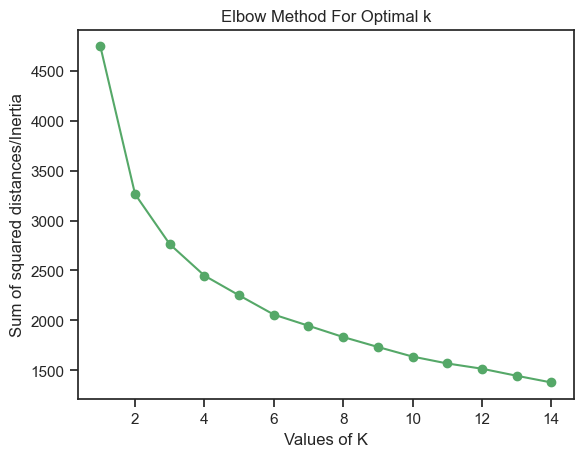

In [56]:
'''
We apply k means to our data to our dataset to classify them in different clusters.
Here, we experiment with different values of number of clusters, i.e., k and choose the optimal k from the elbow plot.
'''

Sum_of_squared_distances = []
K = range(1,15)
for num_clusters in K :
        kmeans = KMeans(n_clusters=num_clusters,random_state=0)
        kmeans.fit(df_log)
        Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'go-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

We choose 4 clusters to be optimal

In [57]:
'''
Applying k-means with 4 clusters and displaying which cluster has how many members.

'''

k=4
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(df_log)
pred = kmeans.predict(df_log)

for i in range(0, k):
    x = len(pred[pred == i])
    print ('Cluster %d has %d members' % ((i + 1), x))

Cluster 1 has 144 members
Cluster 2 has 114 members
Cluster 3 has 121 members
Cluster 4 has 61 members


In [58]:
df_log['cluster'] = kmeans.labels_
df_log

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,9.446992,9.175438,8.930891,5.370638,7.891705,7.199678,2
1,8.861917,9.191259,9.166284,7.474772,8.099858,7.482682,2
2,8.756840,9.083529,8.947026,7.785721,8.165364,8.967632,2
3,9.492960,7.087574,8.348064,8.764834,6.230481,7.489412,1
4,10.026413,8.596189,8.881697,8.272826,7.483244,8.553718,1
...,...,...,...,...,...,...,...
435,10.299037,9.396986,9.682092,9.483112,5.209486,7.698483,1
436,10.577172,7.266827,6.639876,8.414274,4.543295,7.760893,1
437,9.584108,9.647885,10.317053,6.082219,9.605216,7.532624,2
438,9.239025,7.591862,7.711101,6.946014,5.129899,7.661998,0


Plotting scatterplot of all possible combinations of columns categorized by their cluster membership

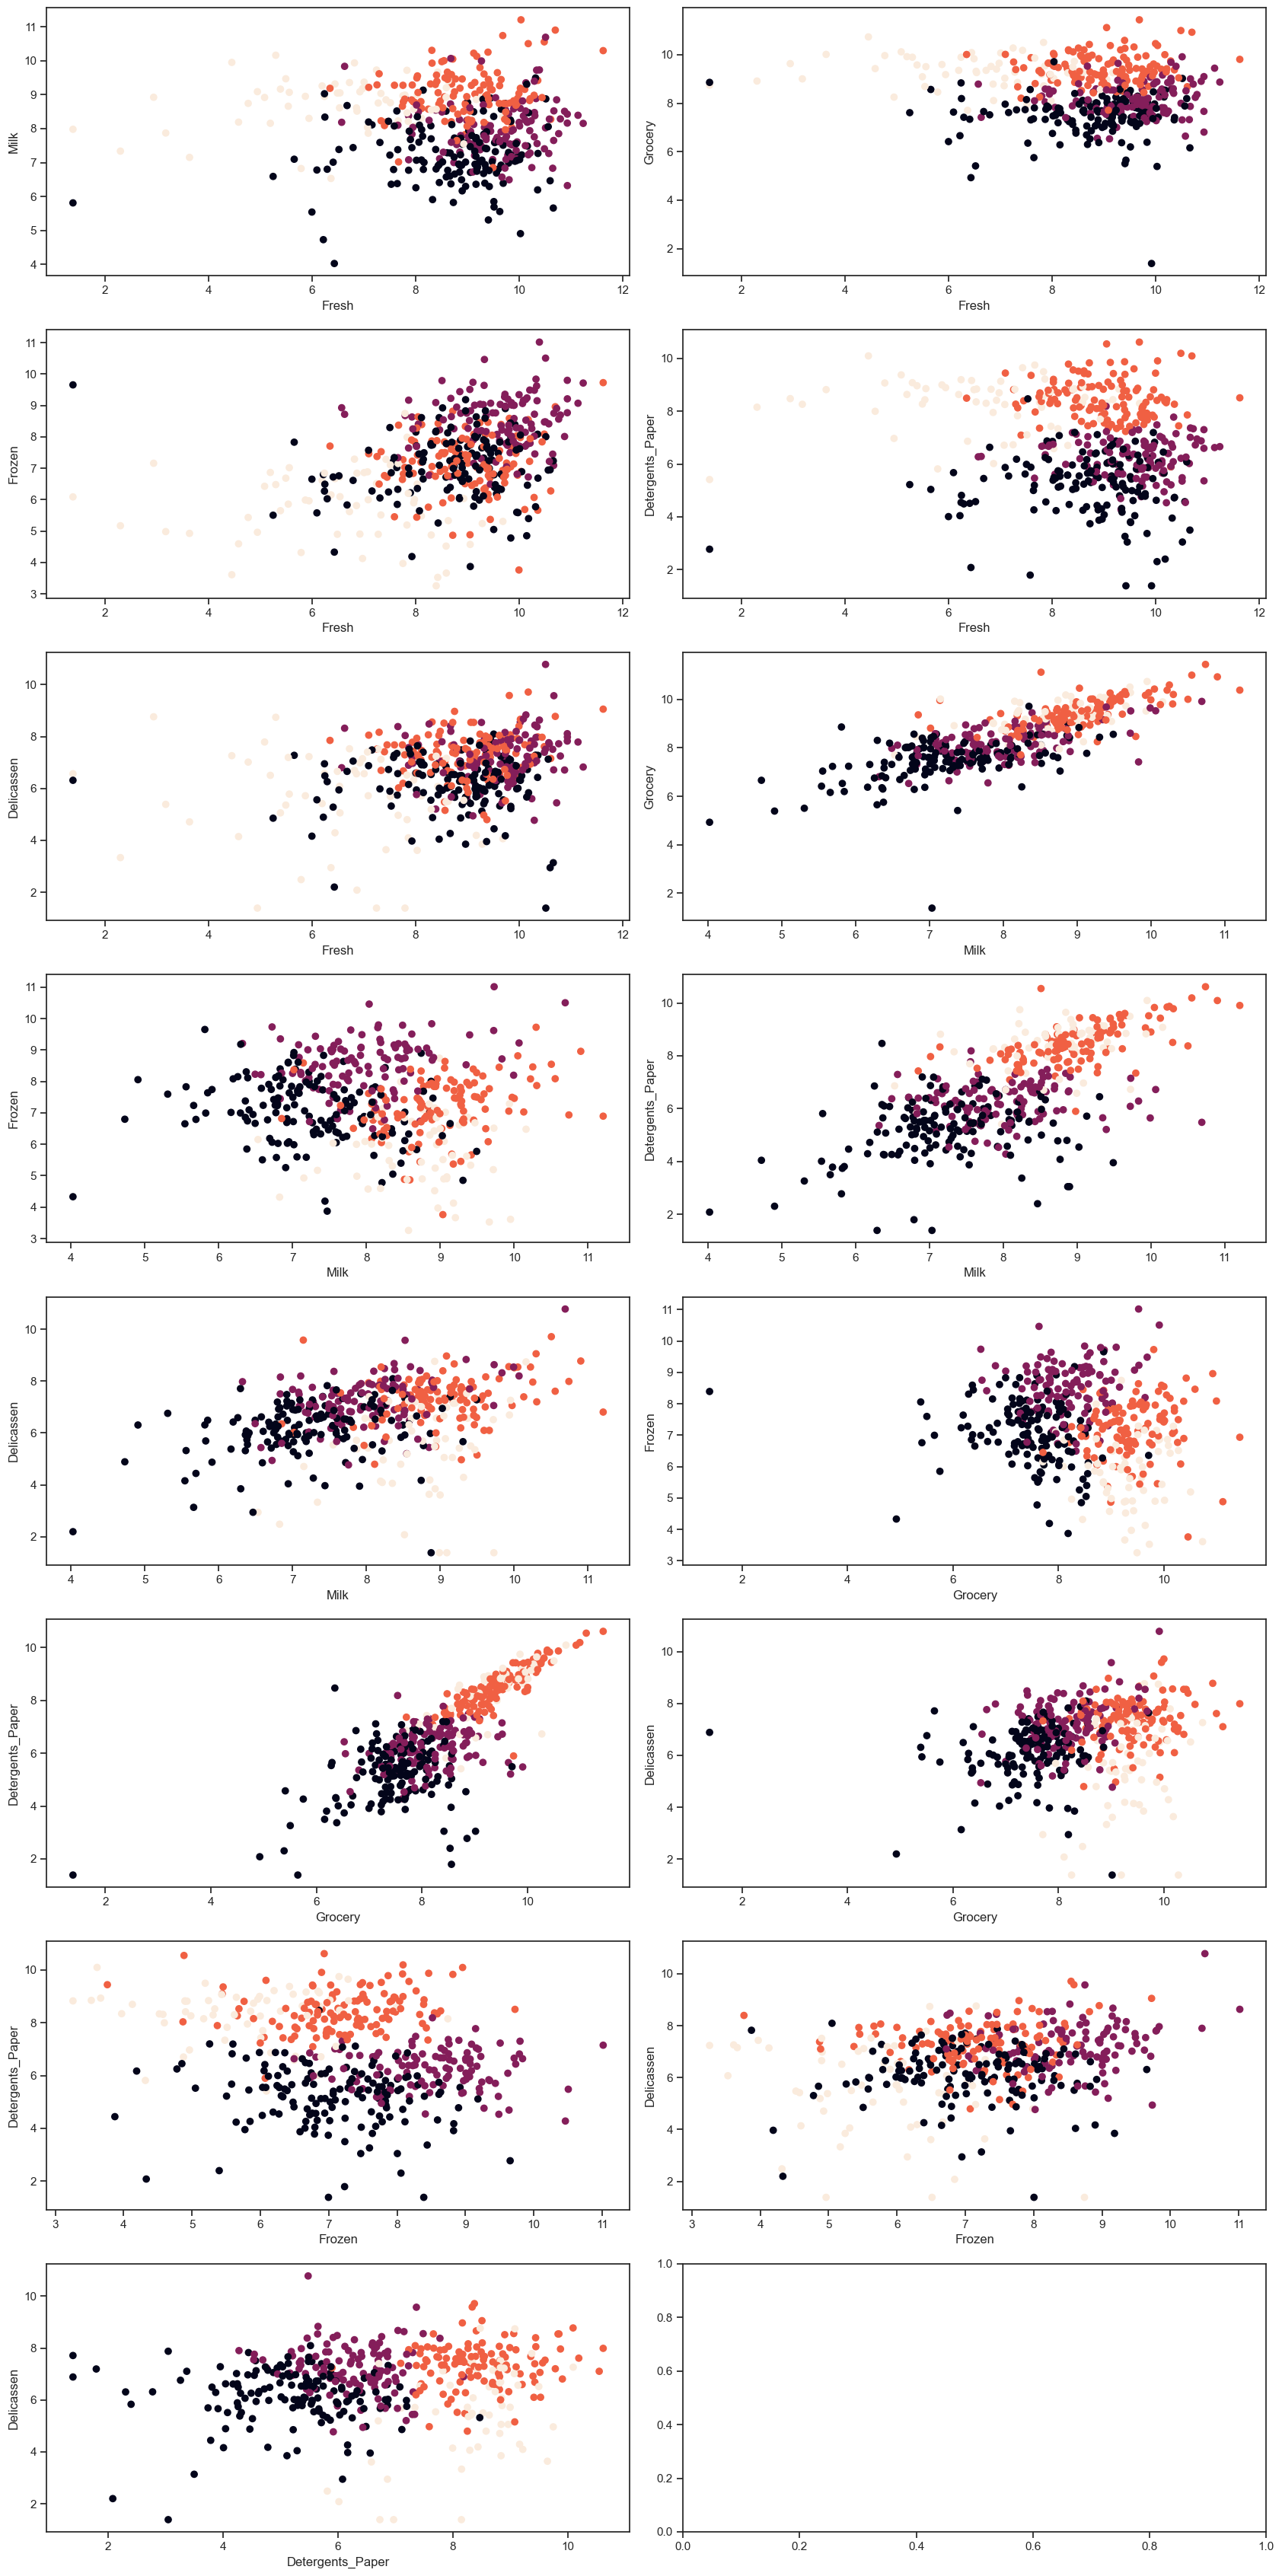

In [59]:
# Get all combinations of column pairs for x and y axes
col_pairs = [(x, y) for i, x in enumerate(df_log.columns) for j, y in enumerate(df_log.columns) if i < j and "cluster" not in (x, y)]
# print(col_pairs)

# Determine the number of rows needed for the grid
num_rows = int(np.ceil(len(col_pairs) / 2))

# Create a grid of subplots with 2 columns and dynamic number of rows
fig, axs = plt.subplots(nrows=num_rows, ncols=2, figsize=(17, 34))

# Generate scatter plots for each combination of columns in x and y axes
for i, col_pair in enumerate(col_pairs):
    x_col, y_col = col_pair
    row_idx = i // 2
    col_idx = i % 2

    ax = axs[row_idx, col_idx]
#     print(row_idx, col_idx)
    ax.scatter(x=df_log[x_col], y=df_log[y_col], c=df_log['cluster'])
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)


# Add a title for the whole plot
# plt.suptitle('Scatter plots of all column pairs')

plt.tight_layout()
plt.show()

Visualizing K-Means performance in different methods of embedding, such as: T-SNE and MDS

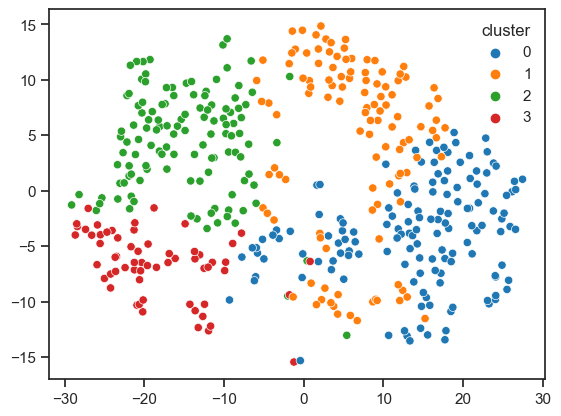

In [60]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
embed = tsne.fit_transform(df_log.iloc[:,:-1])

sns.scatterplot(x=embed[:,0], y=embed[:,1], hue=df_log['cluster'], palette='tab10')
plt.show()

<Axes: >

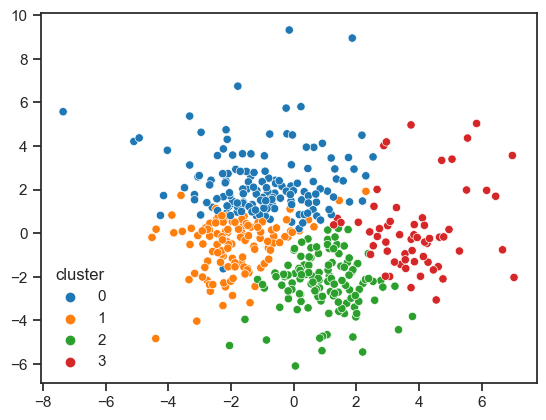

In [61]:
embedding = MDS(n_components=2)
df_mds = embedding.fit_transform(df_log.iloc[:,:-1])
sns.scatterplot(x=df_mds[:,0], y=df_mds[:,1], hue=df_log['cluster'], palette='tab10')
